In [1]:
import numpy as np
import scipy
import sys
import os
tokenlab_path=os.path.abspath("").replace('notebooks','src')
sys.path.insert(0,tokenlab_path)

from TokenLab.simulationcomponents import *
from TokenLab.simulationcomponents.usergrowthclasses import *
from TokenLab.simulationcomponents.transactionclasses import *
from TokenLab.simulationcomponents.tokeneconomyclasses import *
from TokenLab.simulationcomponents.transactionclasses import *
from TokenLab.simulationcomponents.agentpoolclasses import *
from TokenLab.simulationcomponents.pricingclasses import *
from utils.helpers import *
from matplotlib import pyplot as plt

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
ITERATIONS=72
HOLDING_TIME=0.1
SUPPLY=10**9

In [3]:
#Primary
usm=UserGrowth_Spaced(100,104000,ITERATIONS,log_saturated_space)
tsm=TransactionManagement_Stochastic(activity_probs=np.linspace(0.25,0.1,ITERATIONS),
                                            value_dist_parameters={'loc':100,'scale':100/7},
                                           transactions_dist_parameters={'mu':1})

ap=AgentPool_Basic(users_controller=usm,transactions_controller=tsm,currency='$')

In [4]:
te=TokenEconomy_Basic(holding_time=HOLDING_TIME,supply=SUPPLY,initial_price=0.1,burn_token=False)
te.add_agent_pools([ap])
meta=TokenMetaSimulator(te)
meta.execute(iterations=ITERATIONS,repetitions=50)
reps=meta.get_data()

100%|███████████████████████████████████████████| 50/50 [00:01<00:00, 28.48it/s]


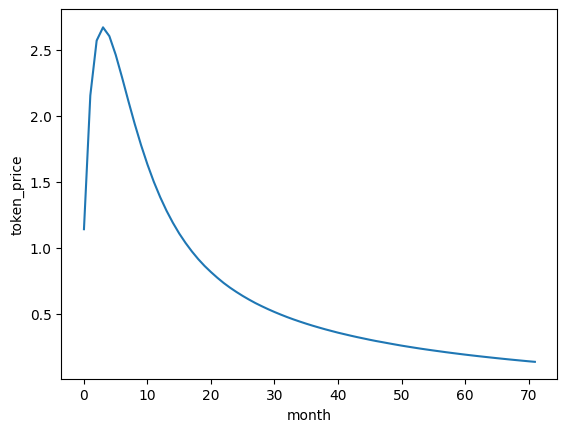

In [5]:
plot,data=meta.get_timeseries('token_price')
plot

# Experiment 2: Transactions with drift

In [8]:
#Primary
usm=UserGrowth_Spaced(100,104000,ITERATIONS,log_saturated_space)
tsm=TransactionManagement_Stochastic(activity_probs=np.linspace(0.25,0.1,ITERATIONS),
                                            value_dist_parameters={'loc':100,'scale':100/7},
                                            value_drift_parameters = {'loc':100},
                                           transactions_dist_parameters={'mu':1},
                                    transactions_drift_parameters={'mu':10})

ap=AgentPool_Basic(users_controller=usm,transactions_controller=tsm,currency='$')



100%|███████████████████████████████████████████| 50/50 [00:01<00:00, 32.35it/s]


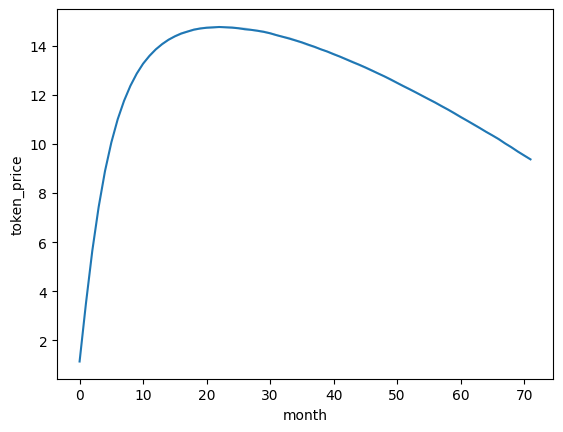

In [9]:
te=TokenEconomy_Basic(holding_time=HOLDING_TIME,supply=SUPPLY,initial_price=0.1,burn_token=False)
te.add_agent_pools([ap])
meta=TokenMetaSimulator(te)
meta.execute(iterations=ITERATIONS,repetitions=50)
reps=meta.get_data()

plot,data=meta.get_timeseries('token_price')
plot